<a href="https://colab.research.google.com/github/amanda-araujo/intro-comp-mercado-financeiro/blob/main/Riskfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Riskfolio

**Riskfolio-Lib**

Quantitative Strategic Asset Allocation, Easy for Everyone.

> Riskfolio-Lib is a library for making portfolio optimization and quantitative strategic asset allocation in Python made in Peru 🇵🇪. Its objective is to help students, academics and practitioners to build investment portfolios based on mathematically complex models with low effort. It is built on top of CVXPY and closely integrated with pandas data structures.

[riskfolio-lib](https://riskfolio-lib.readthedocs.io/en/latest/index.html)

## Instalação de bibliotecas

In [ ]:
!pip install yfinance --upgrade --no-cache-dir

In [ ]:
!pip install pybind11
#!pip install path/cvxpy-version.whl
!pip install riskfolio-lib

In [3]:
import riskfolio as rp
import yfinance as yf
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

sns.set(style = 'whitegrid')

## Obtenção de dados

In [4]:
acoes = ['ITUB4.SA', 'BBDC4.SA', 'DIRR3.SA', 'JBSS3.SA', 'GUAR3.SA', 'PSSA3.SA']

ydata = yf.download(acoes, '2015-01-01', '2019-12-31', '1d') 
dados = ydata["Adj Close"]

[*********************100%***********************]  6 of 6 completed


In [5]:
dados = dados * 100 / dados.iloc[0]

In [6]:
display(dados)

,BBDC4.SA,DIRR3.SA,GUAR3.SA,ITUB4.SA,JBSS3.SA,PSSA3.SA
Date,,,,,,
2015-01-02,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2015-01-05,100.206258,95.179239,96.835283,100.502571,100.473933,99.806428
2015-01-06,103.502716,92.459816,96.517610,102.128361,98.104273,98.548365
2015-01-07,107.615923,94.190353,98.289364,105.823279,100.853073,98.709668
2015-01-08,108.170232,95.920889,96.847493,107.478593,101.706169,98.064517
...,...,...,...,...,...,...
2019-12-20,258.607152,240.583832,249.859401,252.892771,263.111240,279.456013
2019-12-23,260.201193,244.995081,254.630273,255.248435,266.349491,281.233401
2019-12-26,263.461843,256.532282,264.171923,259.128457,268.069805,282.344329


<Axes: xlabel='Date'>

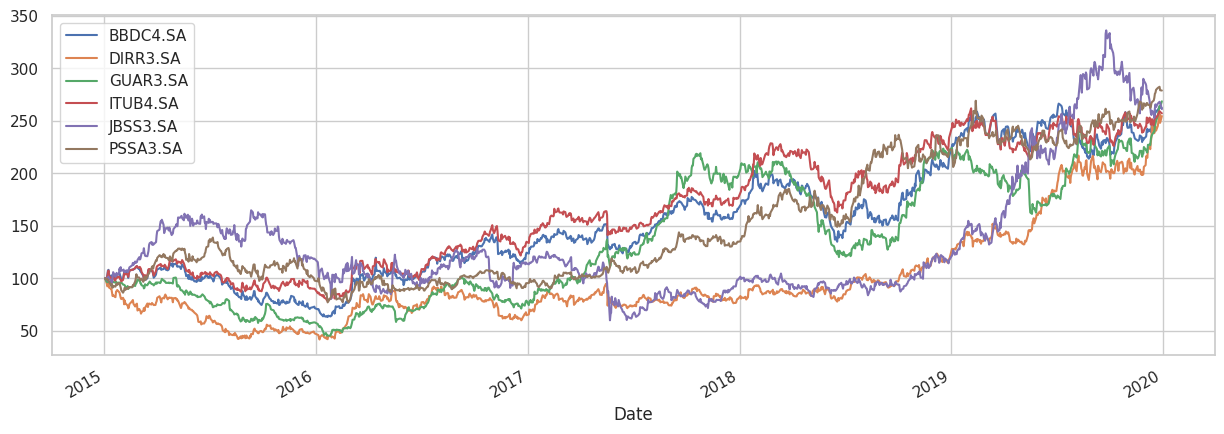

In [7]:
dados.plot(figsize = (15, 5))

In [8]:
dados_chg = dados.pct_change()
dados_chg = dados_chg.fillna(0)

## Preparação dos dados e otimização do portifólio

In [18]:
port = rp.Portfolio(returns = dados_chg)

method_mu = 'hist'  # Expectativa de retorno baseada no histórico das ações
method_cov = 'hist' # Cálculo de covariância baseada no histórico das ações

port.assets_stats(method_mu = method_mu, method_cov = method_cov, d = 0.94)

# Parâmetros:
model = 'Classic' # 'Classic': historical; 'BL': Black Litterman; 'FM': Factor Model
rm = 'MV'         # 'MV': desvio padrão; 'MSV': Semi-desvio padrão (-); 'CVaR': valor em risco condicional
obj = 'MinRisk'   # Função objetivo: MinRisk, MaxRet, Utility or Sharpe
rf_anual = 0.12   # Taxa de retorno livre de risco (anual)

rf = ((1 + rf_anual)**(1/252)) - 1 # Ajuste da taxa de retorno livre de risco 

# Otimização do portifólio:
w = port.optimization(model = model, rm = rm, obj = obj, rf = rf)

display(w.T)

,BBDC4.SA,DIRR3.SA,GUAR3.SA,ITUB4.SA,JBSS3.SA,PSSA3.SA
weights,2.448925e-09,0.111784,0.234633,0.238978,0.108532,0.306072


Riskfolio-lib vai otimizar um portifólio que utiliza (até) todos os ativos indicados. Se tivermos um grande número de ativos, podemos ter uma combinação bem complexa deles. 

/usr/local/lib/python3.9/dist-packages/riskfolio/src/PlotFunctions.py:643: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sizes2 = sizes2.append(item)


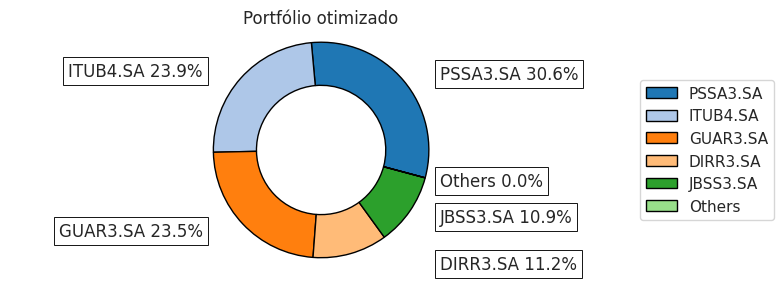

In [19]:
# Plot do portfólio

ax = rp.plot_pie(w = w, title = 'Portfólio otimizado', others = 0.05,
                 nrow = 25, cmap = 'tab20', height = 3, width = 8, ax = None)

## Fronteira eficiente

In [21]:
# Cálculo dos pontos da fronteira eficiente

points = 50
frontier = port.efficient_frontier(model = model, rm = rm, points = points, rf = rf, hist = 'hist')

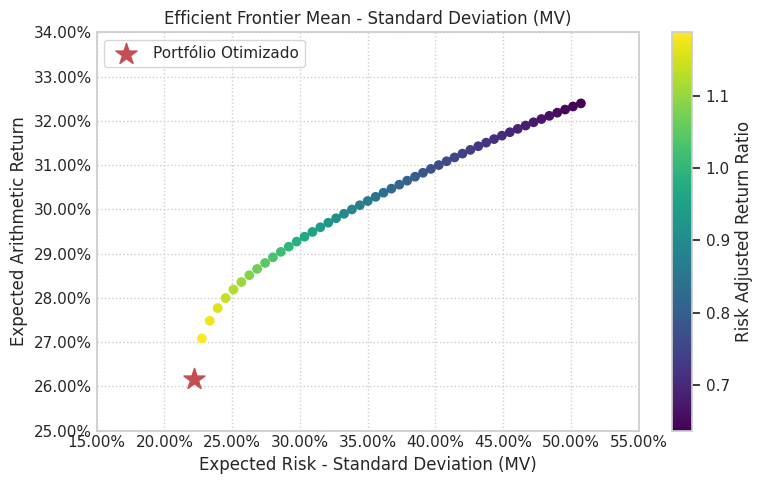

In [22]:
# Plot da fronteira eficiente

label = 'Portfólio Otimizado' # Title of point
mu = port.mu # Expected returns
cov = port.cov # Covariance matrix
returns = port.returns # Returns of the assets

ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                      rf=rf, alpha=0.05, cmap='viridis', w=w, label=label,
                      marker='*', s=16, c='r', height=5, width=8, ax=None)

## Otimização do portifólio - Função objetivo: Sharpe

In [23]:
port = rp.Portfolio(returns = dados_chg)

method_mu = 'hist'  # Expectativa de retorno baseada no histórico das ações
method_cov = 'hist' # Cálculo de covariância baseada no histórico das ações

port.assets_stats(method_mu = method_mu, method_cov = method_cov, d = 0.94)

# Parâmetros:
model = 'Classic' # 'Classic': historical; 'BL': Black Litterman; 'FM': Factor Model
rm = 'MV'         # 'MV': desvio padrão; 'MSV': Semi-desvio padrão (-); 'CVaR': valor em risco condicional
obj = 'Sharpe'   # Função objetivo: MinRisk, MaxRet, Utility or Sharpe
rf_anual = 0.12   # Taxa de retorno livre de risco (anual)

rf = ((1 + rf_anual)**(1/252)) - 1 # Ajuste da taxa de retorno livre de risco 

# Otimização do portifólio:
w = port.optimization(model = model, rm = rm, obj = obj, rf = rf)

display(w.T)

,BBDC4.SA,DIRR3.SA,GUAR3.SA,ITUB4.SA,JBSS3.SA,PSSA3.SA
weights,0.042325,0.156372,0.245645,0.032174,0.20341,0.320074


/usr/local/lib/python3.9/dist-packages/riskfolio/src/PlotFunctions.py:643: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sizes2 = sizes2.append(item)


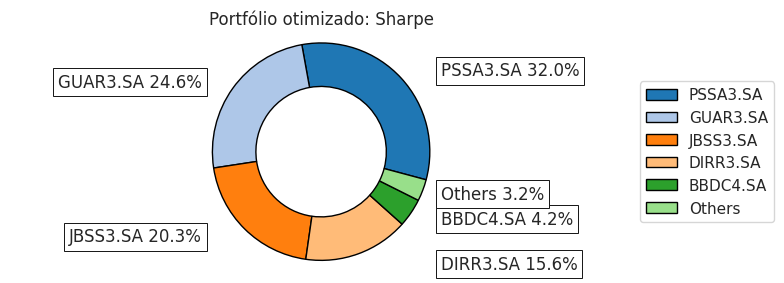

In [24]:
# Plot do portfólio

ax = rp.plot_pie(w = w, title = 'Portfólio otimizado: Sharpe', others = 0.05,
                 nrow = 25, cmap = 'tab20', height = 3, width = 8, ax = None)

> Alterando a função objetivo (mínimo risco para máx Sharpe), obtemos um resultado diferente para a composição do portfólio.

In [25]:
# Cálculo dos pontos da fronteira eficiente

points = 50
frontier = port.efficient_frontier(model = model, rm = rm, points = points, rf = rf, hist = 'hist')

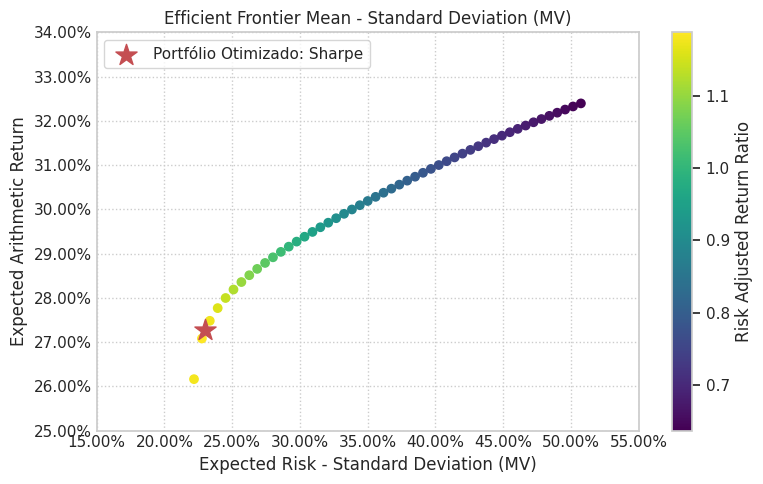

In [26]:
# Plot da fronteira eficiente

label = 'Portfólio Otimizado: Sharpe' # Title of point
mu = port.mu # Expected returns
cov = port.cov # Covariance matrix
returns = port.returns # Returns of the assets

ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                      rf=rf, alpha=0.05, cmap='viridis', w=w, label=label,
                      marker='*', s=16, c='r', height=5, width=8, ax=None)

> O portfólio otimizado já não é o de menor risco. Temos uma renda fixa de 12% ao ano, ponto no qual a reta de capitais tangencia a fronteira eficiente: portfólio de maior índice Sharpe.

## Report: estatísticas

In [27]:
#ax = rp.jupyter_report(returns, w, rm = rm)
rp.excel_report(returns, w) # Gera arquivo .xlsx

## Valor em risco (VaR)

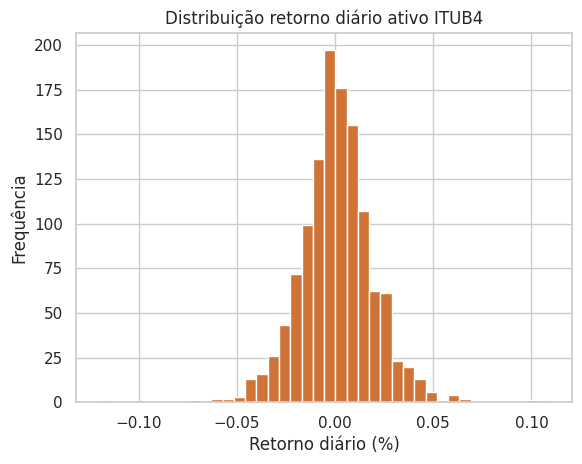

In [33]:
# Histograma retornos diários

plt.hist(dados_chg['ITUB4.SA'], bins = 40, color = '#cf7336')#'#a8326f')
plt.xlabel('Retorno diário (%)')
plt.ylabel('Frequência')
plt.title('Distribuição retorno diário ativo ITUB4')
plt.show()

> A maior parte dos retornos se concentra em torno do zero. 

In [34]:
# Cálculo VaR não-paramétrico

valor = 100000 # assumindo valor hipotético da carteira
q = dados_chg.quantile(q = 0.05, interpolation = 'lower')
print('Quant:', q, q*valor)

Quant: BBDC4.SA   -0.030750
DIRR3.SA   -0.037490
GUAR3.SA   -0.031496
ITUB4.SA   -0.028634
JBSS3.SA   -0.039152
PSSA3.SA   -0.031211
Name: 0.05, dtype: float64 BBDC4.SA   -3075.034165
DIRR3.SA   -3749.022760
GUAR3.SA   -3149.610732
ITUB4.SA   -2863.399754
JBSS3.SA   -3915.183967
PSSA3.SA   -3121.134727
Name: 0.05, dtype: float64


> Obtemos VaR em porcentagem. No caso do Itaú, por exemplo, temos VaR: perda máxima diária, com 95% de confiança, de -2.863%, o que em um portfólio de 100.000 reais corresponderia a 2.863 reais.